In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'pandas'

# Processing and Formatting Data

In [73]:
df = pd.read_csv("symptom-disease.csv")

In [74]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
xdata = df.drop('prognosis', axis=1)
ydata = df["prognosis"]

unique_symptoms = [symptom.replace("_", " ").title() for symptom in xdata.columns]

unique_diseases = set(ydata)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.2, random_state=1)

In [79]:
print(X_train.shape, X_test.shape)

(3936, 132) (984, 132)


# Training The Model

In [96]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

In [142]:
svm_clf = svm.SVC(kernel="linear")
svm_clf.fit(X_train, y_train)

svm_clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

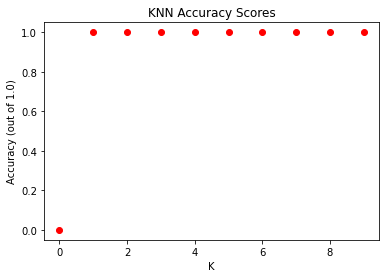

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [118]:
k_max = 10
ks = np.zeros(k_max)
scores = np.zeros(k_max)
for k in range(1, k_max):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    yhat = knn_clf.predict(X_test)
    score = accuracy_score(yhat, y_test)
    ks[k-1] = k
    scores[k-1] = score

plt.plot(ks, scores, 'ro')
plt.title("KNN Accuracy Scores")
plt.xlabel("K")
plt.ylabel("Accuracy (out of 1.0)")
plt.show()

best_k = np.argmax(scores)+1
    
knn_clf = KNeighborsClassifier(n_neighbors = best_k)
knn_clf.fit(X_train, y_train)

knn_clf

In [120]:
dt_clf = DecisionTreeClassifier(criterion="entropy")
dt_clf.fit(X_train, y_train)

dt_clf

1.0

In [143]:
svm_yhat = svm_clf.predict(X_test)
knn_yhat = knn_clf.predict(X_test)
dt_yhat = dt_clf.predict(X_test)

In [144]:
print("SVM: ", accuracy_score(y_test, svm_yhat))
print("KNN: ", accuracy_score(y_test, knn_yhat))
print("Decision Tree: ", accuracy_score(y_test, dt_yhat))

SVM:  1.0
KNN:  1.0
Decision Tree:  1.0


# Personal Testing (Final Model = SVM)

In [135]:
active_symptoms = np.zeros(132).astype('int')
active_symptoms[4] = 1
active_symptoms[10] = 1
active_symptoms[25] = 1
active_symptoms[98] = 1

svm_clf.predict([active_symptoms])

array(['AIDS'], dtype=object)

# Save with Pickle

In [1]:
import pickle

In [2]:
filename = './svm_clf.pkl'
data = {svm_clf: svm_clf, symptoms: unique_symptoms}
with open(filename, 'wb') as f:
    pickle.dump(data, f)

NameError: name 'svm_clf' is not defined

# Load with Pickle

In [151]:
# with open(filename, 'rb') as f:
#     loaded_svm_clf = pickle.load(f)
    
# loaded_svm_clf.predict([np.ones_like(active_symptoms)])

array(['Common Cold'], dtype=object)